#Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Importingg the Iris Dataset

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

#Converting it to DataFrame

In [3]:
df=pd.DataFrame(iris['data'],columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Adding Species

In [4]:
df['Class']=iris.target
df['Class'].replace({0:'Setosa',1:'Versicolor',2:'Verginica'},inplace=True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#Species Distribution

In [5]:
for i in ['Setosa','Versicolor','Verginica']:
  print('{} : {}'.format(i,df[df['Class']==i].Class.count()/len(df)))

Setosa : 0.3333333333333333
Versicolor : 0.3333333333333333
Verginica : 0.3333333333333333


#Plotting the distribution of Different species across various features

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("SepalLength vs Petal Length", "SepalLength vs PetalWidth", "SepalWidth vs PetalLength", "SepalWidth vs PetalWidth"))

fig.add_trace(go.Scatter(x=df.iloc[:,0].values,mode='markers',y=df.iloc[:,2], marker= {'color': iris.target, 'symbol': 'circle'},name="Plot 1"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.iloc[:,0],mode='markers',y=df.iloc[:,3], marker= {'color': iris.target, 'symbol': 'circle'},name="Plot 2"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df.iloc[:,1],mode='markers',y=df.iloc[:,2], marker= {'color': iris.target, 'symbol': 'circle'},name="Plot 3"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df.iloc[:,1],mode='markers',y=df.iloc[:,3], marker= {'color': iris.target, 'symbol': 'circle'},name="Plot 4"),row=2, col=2)

fig.update_layout(
     title={
        'text': "Species Distribution across different features",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)


fig.show()

#Splitting into train and test data

In [7]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=iris.target

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

#Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(X_train[:,0].reshape(-1, 1), X_train[:,1].reshape(-1, 1))


LinearRegression()

In [12]:
train_score=lr.score(X_train[:,0].reshape(-1, 1),X_train[:,1].reshape(-1, 1))
test_score=lr.score(X_test[:,0].reshape(-1, 1),X_test[:,1].reshape(-1, 1))

print(train_score)
print(test_score)

0.01737108749779226
-0.03565155048579305


In [14]:
y_pred_train=[]
length=len(X_train[:,0])
for i in range(length):
  xx=lr.predict(X_train[i,0].reshape(1,-1))
  y_pred_train.append(xx[0][0])
print(y_pred_train[:25])

[3.059048212911614, 3.1005104545333935, 3.0037652240825747, 3.121241575344283, 3.0244963448934645, 3.0659585865152437, 2.920840740839016, 2.9899444768753147, 3.114331201740653, 3.1005104545333935, 3.072868960118874, 3.1488830697588024, 2.920840740839016, 3.0106755976862045, 3.0314067184970943, 3.114331201740653, 2.983034103271685, 2.976123729668055, 3.0797793337225037, 2.976123729668055, 2.9899444768753147, 3.038317092100724, 3.0037652240825747, 2.976123729668055, 3.0866897073261335]


In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(list(X_train[:,1]),y_pred_train)

0.17874734312549076

#Visualizaing the regression using Matplotlib

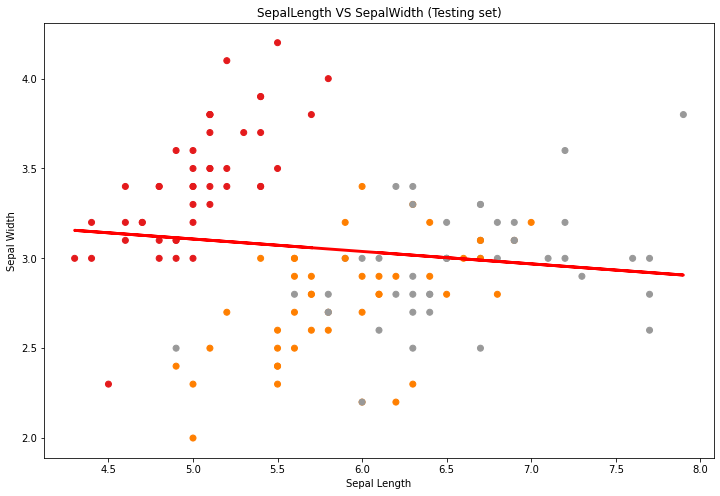

In [16]:
plt.rcParams['figure.figsize']=12,8
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.Set1)
plt.plot(X_train[:,0], y_pred_train, color = "red",linewidth=2.9)
plt.title("SepalLength VS SepalWidth (Testing set)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#sns.regplot()

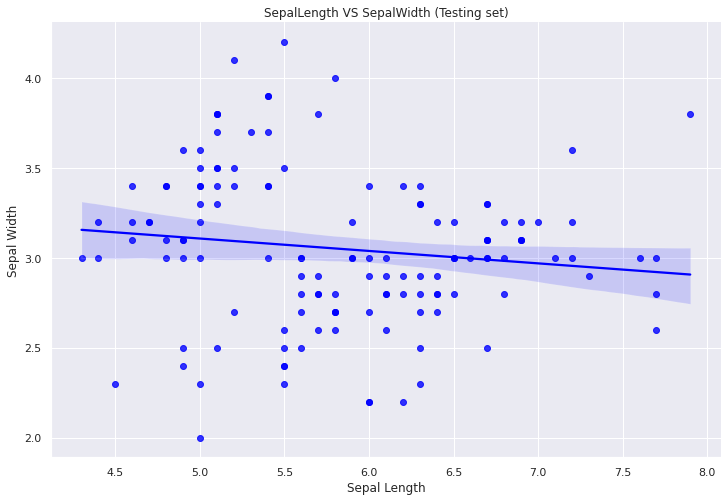

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize']=12,8
plt.figure()
sns.set_theme()
sns.regplot(x=X_train[:,0].reshape(1,-1), y=X_train[:,1].reshape(1,-1),color='blue')
plt.title("SepalLength VS SepalWidth (Testing set)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
sns.despine()
plt.show(sns)


sns.lmplot()

In [19]:
df=pd.DataFrame(X_train,columns=iris.feature_names)

In [20]:
df['Class']=y_train

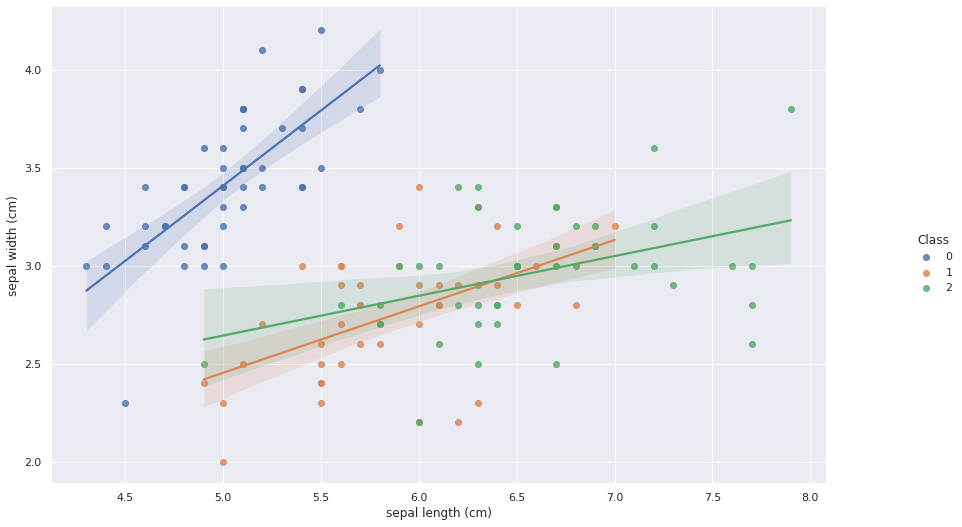

In [21]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)',data=df,hue='Class')
plt.gcf().set_size_inches(15, 8)
plt.show()  

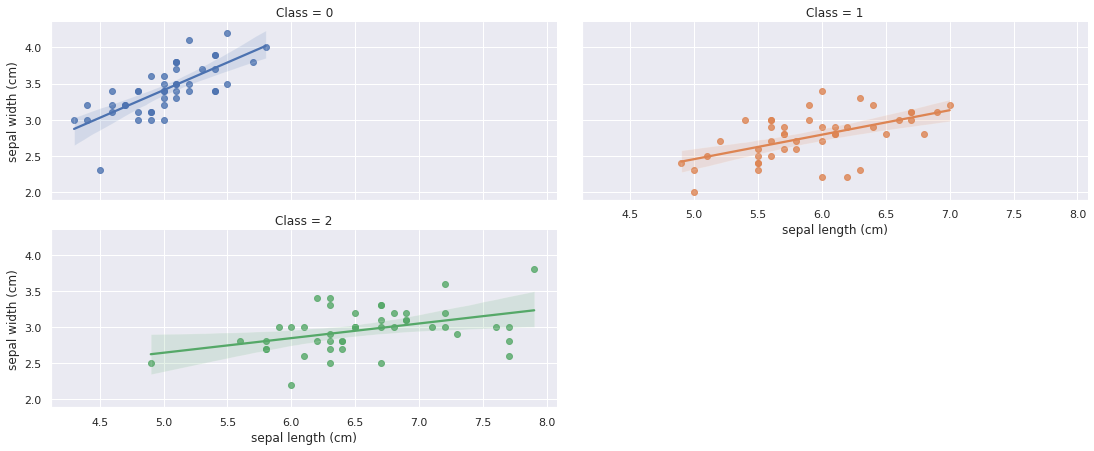

In [22]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)',data=df,col='Class',hue='Class',col_wrap=2)
plt.gcf().set_size_inches(16, 6)